# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

ACT has gained traction in the US as an examination alongside SATs. With the introduction of a new format in the SATs in March 2016 we wish to see its impact on states and understand their preferences and their performances over the two exams. 

Objective

understand the differences and trends of both SAT and ACT status quo and make recommendations to improve the rates of states with low particpation  of SATs.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Citations and Resources](#Citations-and-Resources)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_17 = pd.read_csv('../data/sat_2017.csv')
act_17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

SAT:  
The Data is for 51 states.  
It has means of 39% for participation, 569 for ERW, 556 for Math and 1126 for total  
It has standard deviations of 35.2% for participation, 45 for ERW, 47 for Math and 92 for total  
It has a data range 98% for participation, 162 for ERW, 183 for Math and 345 for total  
Data for Math has a value 52 which seems to be an outlier.

        

ACT:  
The Data is for 51 states and includes the National data as well.  
The mean is 65% for participation (which is higher than SAT 17), around 21 for all subjects  
The standard deviation is 32% for population and around 2 for all subjects except science at 3.18  
The ranges are pretty similar for all subjects except science  
There seems to be an outlier with value 2.3 in science



#### 4a. Does the data look complete? 

Answer: Yes

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

These data give average SAT and ACT scores by state, as well as participation rates, for the graduating class of 2017.


Answer:for the SAT data, there seems to be a typo
and for he ACT data, there seems to be an x on the last entry

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
sat_17.loc[[20], ['Math']] #holding the value 52 which is a typo in the data frame

,Math
20,52


In [6]:
sat_17.loc[[20], ['Math']] = int(524) #replacing the value with the correct one
sat_17.loc[[20], ['Math']] #show new value has been registered in

,Math
20,524


In [7]:
act_17.loc[[51], ['Composite']] #there seems to be a character in the value

,Composite
51,20.2x


In [8]:
act_17.loc[[51], ['Composite']] = float(20.2) #replacing it with a float with value 20.2
act_17.loc[[51], ['Composite']]

,Composite
51,20.2


In [9]:
act_17.loc[[21],['Science']] = float(23.1) #replacing it with a float with value 23.1
act_17.loc[[21],['Science']]

,Science
21,23.1


#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
sat_17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [11]:
act_17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Participation percentages for both should be a float/int and 'Composite' column for ACT 2017 should be type foat and not object.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [12]:
sat_17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [13]:
#removing the percentage symbol from the values in 'Participation'
sat_17['Participation'] = sat_17['Participation'].map(lambda i: i.replace('%','')) 

In [14]:
act_17['Participation'] = act_17['Participation'].map(lambda i: i.replace('%','')) 

- Fix any individual values preventing other columns from being the appropriate type.

In [15]:
#changing all the wrong data types to the correct ones
act_17['Composite']=act_17['Composite'].astype(float)
act_17['Participation']=act_17['Participation'].astype(float)
sat_17['Participation']=sat_17['Participation'].astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [16]:
#changing percentage amount to be a decimal
act_17['Participation']=act_17['Participation']/100
sat_17['Participation']=sat_17['Participation']/100

- Display the data types again to confirm they are correct.

In [17]:
act_17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [18]:
sat_17.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [19]:
#changing all columns to lower case
sat_17.columns = sat_17.columns.str.lower()
#replacing spaces with underscores
sat_17.columns = sat_17.columns.map(lambda i: i.replace(' ','_'))
sat_17.head()

,state,participation,evidence-based_reading_and_writing,math,total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [20]:
#changing all columns to lower case
act_17.columns = act_17.columns.str.lower()
act_17.head()

,state,participation,english,math,reading,science,composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|ACT 2017/SAT 2017|State Name| 
|**participation_act17**|*float*|ACT 2017|Participation Percentage on a scale of 0 to 1(being 100%)| 
|**english_act17**|*float*|ACT 2017|English scores| 
|**math_act17**|*float*|ACT 2017|Math Scores| 
|**reading_act17**|*float*|ACT 2017|Reading Scores| 
|**science_act17**|*float*|ACT 2017|Science Scores| 
|**composite_act17**|*float*|ACT 2017|Composite i.e mix of all the 4 subjects| 
|**participation_sat17**|*float*|SAT 2017|Participation Percentage on a scale of 0 to 1(being 100%)| 
|**evidence_based_reading_and_writing_sat17**|*int*|SAT 2017|Evidence Based Reading and Writing Score| 
|**math_sat17**|*int*|SAT 2017|Math Score| 
|**total_sat17**|*int*|SAT 2017|Total Score of both math and Evidence Based Reading and Writing| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [21]:
act_17.head()

,state,participation,english,math,reading,science,composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [22]:
#the extra row would be the National data of ACT 2017
act_17.drop(act_17.index[0], axis=0, inplace= True )
act_17.head()

,state,participation,english,math,reading,science,composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [23]:
#merging ACT and SAT 2017
act_sat_17 = pd.merge(act_17 ,sat_17, on='state', how='outer')
act_sat_17.head()

,state,participation_x,english,math_x,reading,science,composite,participation_y,evidence-based_reading_and_writing,math_y,total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


In [24]:
#renaming the columns
new_columns_list = ['state', 'participation_act17', 'english_act17',
       'math_act17', 'reading_act17', 'science_act17',
       'composite_act17', 'participation_sat17', 'evidence_based_reading_and_writing_sat17', 'math_sat17',
       'total_sat17']

In [25]:
act_sat_17.columns = new_columns_list
act_sat_17.head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [26]:
#saving dataframe as a csv file named combined_2017
act_sat_17.to_csv('../data/combined_2017.csv', index = False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [27]:
sat_18 = pd.read_csv('../data/sat_2018.csv')
act_18 = pd.read_csv('../data/act_2018.csv')

In [28]:
sat_18.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [29]:
act_18

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6
9,Florida,66%,19.9


In [30]:
#removing % sign from percentages in participation
act_18['Participation'] = act_18['Participation'].map(lambda i: i.replace('%',''))
sat_18['Participation'] = sat_18['Participation'].map(lambda i: i.replace('%','')) 

In [31]:
#changing all the percentages to float
act_18['Participation']=act_18['Participation'].astype(float)
sat_18['Participation']=sat_18['Participation'].astype(float)

In [32]:
#changing percentage amount to be a decimal
act_18['Participation']=act_18['Participation']/100
sat_18['Participation']=sat_18['Participation']/100

In [33]:
#correcting the lower cased c in  'District of columbia'
act_18.loc[[8], ['State']] = 'District of Columbia'
act_18.loc[[8], ['State']]

,State
8,District of Columbia


In [34]:
#dropping the extra row of Maine
act_18=act_18.drop(act_18.index[20])

In [35]:
#a few of the sum of ERW and Math in SAT 18 does not tally with total, requires correction
sat_18.loc[[3], ['Total']] = int(1168)
sat_18.loc[[6], ['Total']] = int(1054)
sat_18.loc[[7], ['Total']] = int(997)
sat_18.loc[[16], ['Total']] = int(1264)
sat_18.loc[[22], ['Total']] = int(1010)
sat_18.loc[[31], ['Total']] = int(1092)
sat_18.loc[[33], ['Total']] = int(1097)
sat_18.loc[[50], ['Total']] = int(1258)

In [36]:
act_18.head()

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [37]:
sat_18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1168
4,California,0.60,540,536,1076


In [38]:
#merging both sat_18 and act_18
act_sat_18 = pd.merge(act_18 ,sat_18, on='State', how='outer')
act_sat_18.head()

,State,Participation_x,Composite,Participation_y,Evidence-Based Reading and Writing,Math,Total
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1168
4,California,0.27,22.7,0.60,540,536,1076


In [39]:
#renaming the columns
new_columns_list2 = ['state', 'participation_act18', 
       'composite_act18', 'participation_sat18', 'evidence_based_reading_and_writing_sat18', 'math_sat18',
       'total_sat18']
act_sat_18.columns = new_columns_list2
act_sat_18.head()

,state,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1168
4,California,0.27,22.7,0.60,540,536,1076


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [40]:
#merging both dataframes to final
final = pd.merge(act_sat_17,act_sat_18, on='state', how='outer')

In [41]:
#saving as a csv file
final.to_csv('../data/final.csv', index = False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [42]:
#transposing the describe method
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
participation_act17,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
english_act17,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
math_act17,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
reading_act17,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
science_act17,51.0,21.449020,1.737397,18.20,19.950,21.30,23.150,24.9
composite_act17,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
participation_sat17,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
evidence_based_reading_and_writing_sat17,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
math_sat17,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
total_sat17,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [43]:
#defining standard deviation
def stddev(dataseries):
    u = (sum(dataseries))/(len(dataseries))
    summ = sum([(x-u)**2 for x in dataseries])
    var = summ/(len(dataseries))
    std = var**0.5
    return std


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [44]:
#A list of column headers created from dataframe columns values
column_headers = final.columns.tolist()

In [45]:
#exclude states as it is a series of type string
column_headers[1:]

['participation_act17',
 'english_act17',
 'math_act17',
 'reading_act17',
 'science_act17',
 'composite_act17',
 'participation_sat17',
 'evidence_based_reading_and_writing_sat17',
 'math_sat17',
 'total_sat17',
 'participation_act18',
 'composite_act18',
 'participation_sat18',
 'evidence_based_reading_and_writing_sat18',
 'math_sat18',
 'total_sat18']

In [46]:
#create dictionary with column header as key and value as stddev function
sd = {a : stddev(final[a]) for a in column_headers[1:]}
sd

{'participation_act17': 0.3182417575123181,
 'english_act17': 2.3304876369363363,
 'math_act17': 1.9624620273436781,
 'reading_act17': 2.0469029314842646,
 'science_act17': 1.7202795656314875,
 'composite_act17': 2.000786081581989,
 'participation_sat17': 0.3492907076664507,
 'evidence_based_reading_and_writing_sat17': 45.21697020437866,
 'math_sat17': 46.65713364485503,
 'total_sat17': 91.58351056778743,
 'participation_act18': 0.33701735820410317,
 'composite_act18': 2.090779082141178,
 'participation_sat18': 0.3694661922353942,
 'evidence_based_reading_and_writing_sat18': 47.03460978357609,
 'math_sat18': 47.30194550378352,
 'total_sat18': 93.26105291477671}

In [47]:
#numpy standard deviation
np.std(final)

participation_act17                          0.318242
english_act17                                2.330488
math_act17                                   1.962462
reading_act17                                2.046903
science_act17                                1.720280
composite_act17                              2.000786
participation_sat17                          0.349291
evidence_based_reading_and_writing_sat17    45.216970
math_sat17                                  46.657134
total_sat17                                 91.583511
participation_act18                          0.337017
composite_act18                              2.090779
participation_sat18                          0.369466
evidence_based_reading_and_writing_sat18    47.034610
math_sat18                                  47.301946
total_sat18                                 93.261053
dtype: float64

In [48]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
participation_act17,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
english_act17,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
math_act17,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
reading_act17,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
science_act17,51.0,21.449020,1.737397,18.20,19.950,21.30,23.150,24.9
composite_act17,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
participation_sat17,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
evidence_based_reading_and_writing_sat17,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
math_sat17,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
total_sat17,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

The describe method is different to the generated function and the numpy's method. This is due the difference in formula used where we used (n) and the describe method used (n-1)

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### SAT 2017 Highest and Lowest Participation

The states with the lowest participation for SAT 2017 are Mississippi, North Dakota and Iowa  
The states with the highest participation for SAT 2017 are District of Columbia, Michigan and Conneticut and Delaware

In [49]:
#sorting values by column participation of SAT 2017
final.sort_values('participation_sat17').head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
34,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,1256,0.98,20.3,0.02,640,643,1283
24,Mississippi,1.00,18.2,18.1,18.8,18.8,18.6,0.02,634,607,1242,1.00,18.6,0.03,630,606,1236
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,1275,0.68,21.8,0.03,634,631,1265
25,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,1271,1.00,20.0,0.04,633,629,1262
44,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238,1.00,20.4,0.04,480,530,1010


In [50]:
final.sort_values('participation_sat17', ascending=False).head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950,0.32,23.6,0.92,497,480,977
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.2,1.00,511,499,1010
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1054
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,997
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063


### SAT 2018 Highest and Lowest Participation

The states with the lowest participation for SAT 2018 is North Dakota  
The states with the highest participation for SAT 2018 are Colorado, Conneticut, Delaware, Michigan, Idaho

In [51]:
final.sort_values('participation_sat18').head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
34,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,1256,0.98,20.3,0.02,640,643,1283
50,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2,0.03,626,604,1230,1.00,20.0,0.03,633,625,1258
41,South Dakota,0.80,20.7,21.5,22.3,22.0,21.8,0.03,612,603,1216,0.77,21.9,0.03,622,618,1240
27,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,1253,1.00,20.1,0.03,629,623,1252
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,1.00,20.5,0.03,641,653,1294


In [52]:
final.sort_values('participation_sat18', ascending=False).head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201,0.30,23.9,1.0,519,506,1025
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.0,535,519,1054
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.0,505,492,997
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.2,1.0,511,499,1010
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.0,508,493,1001


#### Do any states with 100% participation on a given test have a rate change year-to-year?

It appears District of Columbia did not have a participation of 100% in 2018 vs 2017

### ACT 2017 Highest and Lowest Participation

The states with the lowest participation for ACT 2018 is Maine  
The states with the highest participation for ACT 2018 are Alabama, Kentucky, Winsconsin, Utah and Tennessee

In [53]:
final.sort_values('participation_act17').head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,997
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,1062,0.15,24.2,0.97,513,505,1018
38,Pennsylvania,0.23,23.4,23.4,24.2,23.3,23.7,0.65,540,531,1071,0.20,23.5,0.70,547,539,1086


In [54]:
final.sort_values('participation_act17', ascending=False).head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
0,Alabama,1.0,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.0,19.1,0.06,595,571,1166
17,Kentucky,1.0,19.6,19.4,20.5,20.1,20.0,0.04,631,616,1247,1.0,20.2,0.04,630,618,1248
49,Wisconsin,1.0,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,1.0,20.5,0.03,641,653,1294
44,Utah,1.0,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238,1.0,20.4,0.04,480,530,1010
42,Tennessee,1.0,19.5,19.2,20.1,19.9,19.8,0.05,623,604,1228,1.0,19.6,0.06,624,607,1231


### ACT 2018 Highest and Lowest Participation

The states with the lowest participation for ACT 2018 are Maine  
The states with the highest participation for ACTT 2018 are Colorado, Alabama, Kentucky, Winsconsin, Utah and Tennesse

In [55]:
final.sort_values('participation_act18').head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,1062,0.15,24.2,0.97,513,505,1018
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,997
38,Pennsylvania,0.23,23.4,23.4,24.2,23.3,23.7,0.65,540,531,1071,0.20,23.5,0.70,547,539,1086


In [56]:
final.sort_values('participation_act18', ascending=False).head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
0,Alabama,1.0,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.0,19.1,0.06,595,571,1166
17,Kentucky,1.0,19.6,19.4,20.5,20.1,20.0,0.04,631,616,1247,1.0,20.2,0.04,630,618,1248
49,Wisconsin,1.0,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,1.0,20.5,0.03,641,653,1294
44,Utah,1.0,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238,1.0,20.4,0.04,480,530,1010
42,Tennessee,1.0,19.5,19.2,20.1,19.9,19.8,0.05,623,604,1228,1.0,19.6,0.06,624,607,1231


#### Do any states with 100% participation on a given test have a rate change year-to-year?

There was no change for the ACT particpation of those with 100% participation between 2017 and 2018

### SAT 2017 Highest and Lowest Total

The states with the lowest Total for SAT 2018 is District of Columbia   
The states with the highest Total for SAT 2018 is Minnesota

In [57]:
final.sort_values('total_sat17').head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950,0.32,23.6,0.92,497,480,977
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,997
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.00,508,493,1001
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.2,1.00,511,499,1010
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013


In [58]:
final.sort_values('total_sat17', ascending=False).head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
23,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295,0.99,21.3,0.04,643,655,1298
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,1.00,20.5,0.03,641,653,1294
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,1275,0.68,21.8,0.03,634,631,1265
25,Missouri,1.00,19.8,19.9,20.8,20.5,20.4,0.03,640,631,1271,1.00,20.0,0.04,633,629,1262
16,Kansas,0.73,21.1,21.3,22.3,21.7,21.7,0.04,632,628,1260,0.71,21.6,0.04,633,631,1264


### SAT 2018 Highest and Lowest Total

The states with the lowest Total for SAT 2018 is District of Columbia   
The states with the highest Total for SAT 2018 is Minnesota

In [59]:
final.sort_values('total_sat18').head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950,0.32,23.6,0.92,497,480,977
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,997
48,West Virginia,0.69,20.0,19.4,21.2,20.5,20.4,0.14,558,528,1086,0.65,20.3,0.28,513,486,999
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.00,508,493,1001
44,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238,1.00,20.4,0.04,480,530,1010


In [60]:
final.sort_values('total_sat18', ascending=False).head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
23,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295,0.99,21.3,0.04,643,655,1298
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,1.00,20.5,0.03,641,653,1294
34,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,0.02,635,621,1256,0.98,20.3,0.02,640,643,1283
15,Iowa,0.67,21.2,21.3,22.6,22.1,21.9,0.02,641,635,1275,0.68,21.8,0.03,634,631,1265
16,Kansas,0.73,21.1,21.3,22.3,21.7,21.7,0.04,632,628,1260,0.71,21.6,0.04,633,631,1264


### ACT 2017 Highest and Lowest Composite

The states with the lowest Total for SAT 2018 is Nevada   
The states with the highest Total for SAT 2018 is New Hampshire

In [61]:
final.sort_values('composite_act17').head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
28,Nevada,1.0,16.3,18.0,18.1,18.2,17.8,0.26,563,553,1116,1.00,17.7,0.23,574,566,1140
24,Mississippi,1.0,18.2,18.1,18.8,18.8,18.6,0.02,634,607,1242,1.00,18.6,0.03,630,606,1236
40,South Carolina,1.0,17.5,18.6,19.1,18.9,18.7,0.50,543,521,1064,1.00,18.3,0.55,547,523,1070
11,Hawaii,0.9,17.8,19.2,19.2,19.3,19.0,0.55,544,541,1085,0.89,18.9,0.56,480,530,1010
33,North Carolina,1.0,17.8,19.3,19.6,19.3,19.1,0.49,546,535,1081,1.00,19.1,0.52,554,543,1097


In [62]:
final.sort_values('composite_act17', ascending=False).head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
21,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,1107,0.25,25.5,0.80,562,563,1125
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1054
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950,0.32,23.6,0.92,497,480,977


### ACT 2018 Highest and Lowest Composite

The states with the lowest Total for SAT 2018 is Nevada   
The states with the highest Total for SAT 2018 is Conneticut

In [63]:
final.sort_values('composite_act18').head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
28,Nevada,1.0,16.3,18.0,18.1,18.2,17.8,0.26,563,553,1116,1.00,17.7,0.23,574,566,1140
40,South Carolina,1.0,17.5,18.6,19.1,18.9,18.7,0.50,543,521,1064,1.00,18.3,0.55,547,523,1070
24,Mississippi,1.0,18.2,18.1,18.8,18.8,18.6,0.02,634,607,1242,1.00,18.6,0.03,630,606,1236
11,Hawaii,0.9,17.8,19.2,19.2,19.3,19.0,0.55,544,541,1085,0.89,18.9,0.56,480,530,1010
0,Alabama,1.0,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166


In [64]:
final.sort_values('composite_act18', ascending=False).head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1054
21,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,1107,0.25,25.5,0.80,562,563,1125
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
32,New York,0.31,23.8,24.0,24.6,23.9,24.2,0.67,528,523,1052,0.27,24.5,0.79,534,534,1068
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.2,1.00,511,499,1010


#### Do any states show have >50% participation on both tests either year?

Yes, in particular the states Florida, Georgia, Hawaii in 2017 in 2017   
and the states Florida, Georgia, Hawaii, North & South Carolina in 2018

In [65]:
#dataframe of the states that satisfy both tests' participation
plus_50_17 = final[(final['participation_sat17']>0.5) & (final['participation_act17']>0.5)]
plus_50_17

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.66,19.9,0.56,550,549,1099
10,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,1050,0.53,21.4,0.70,542,522,1064
11,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,1085,0.89,18.9,0.56,480,530,1010


In [66]:
plus_50_18 = final[(final['participation_sat18']>0.5) & (final['participation_act18']>0.5)]
plus_50_18

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,evidence_based_reading_and_writing_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,evidence_based_reading_and_writing_sat18,math_sat18,total_sat18
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.66,19.9,0.56,550,549,1099
10,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,1050,0.53,21.4,0.70,542,522,1064
11,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,1085,0.89,18.9,0.56,480,530,1010
33,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,1081,1.00,19.1,0.52,554,543,1097
40,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,1064,1.00,18.3,0.55,547,523,1070


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [67]:
#getting correlation numbers
final_correlation = final.corr()

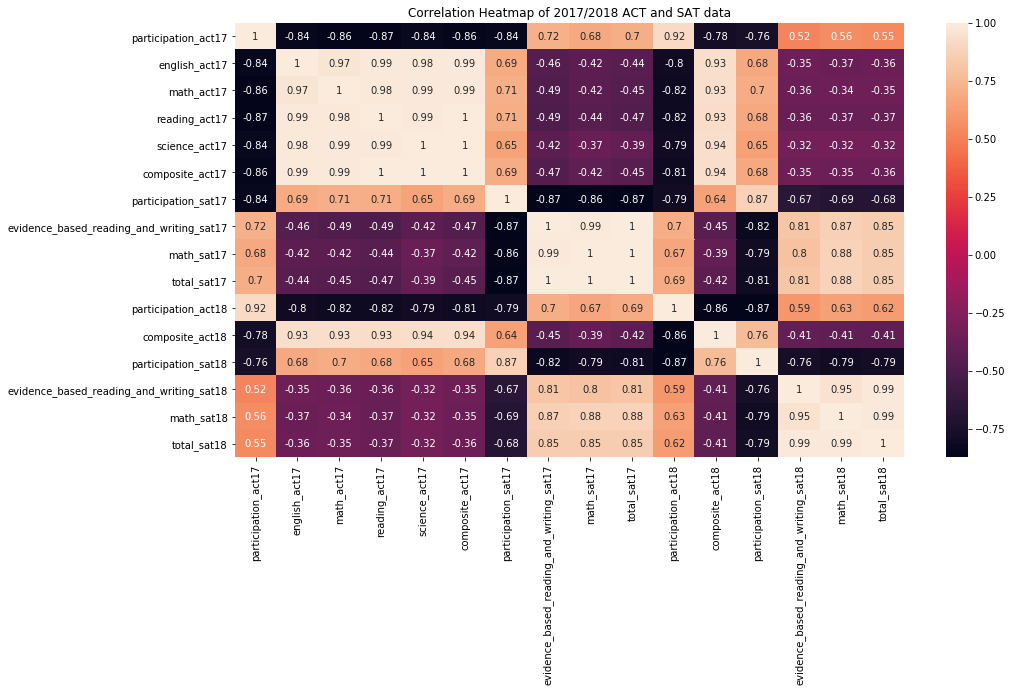

In [68]:
fig, ax = plt.subplots(figsize=(15,8)) #creating figure area
ax.set_title('Correlation Heatmap of 2017/2018 ACT and SAT data') #setting title
sns.heatmap(final_correlation, annot=True);  #plotting heatmap

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [69]:
def subplot_histograms(plotname, dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,10)) # specified figsize
    fig.suptitle(plotname, fontsize=16)# plot title added
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_title(column)  #title for each plot
        ax[i].set_xlabel(list_of_xlabels, size = 'large') #xlabel
        ax[i].set_ylabel(list_of_titles, size= 'large')  #ylabel

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

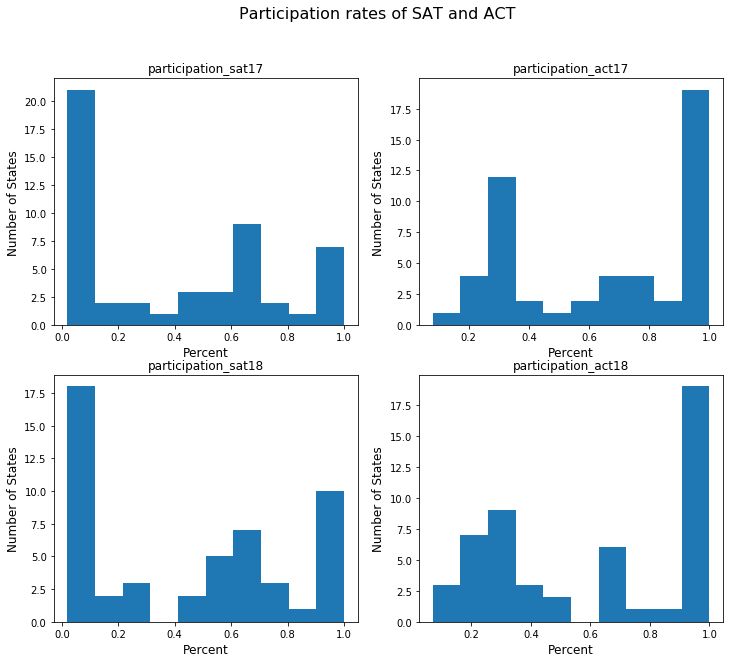

In [70]:
# Histogram of Participation rates for SAT & ACT
subplot_histograms('Participation rates of SAT and ACT',final,
                   ['participation_sat17','participation_act17','participation_sat18','participation_act18' ],
                   'Number of States', 'Percent')

#### Observation and Intepretation of Participation
Trends for both years for both exams are similar, so there hasnt been much change in terms of year to year.  
However they do seem to be inversely proportional

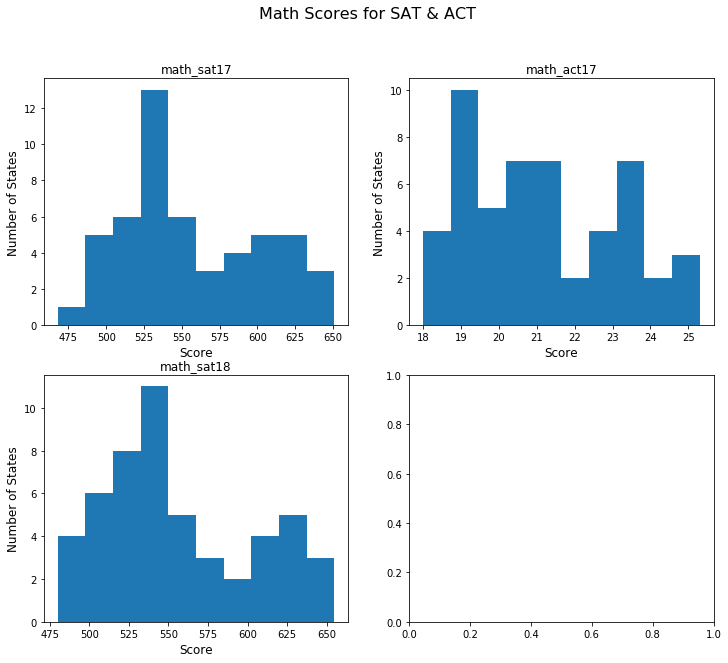

In [71]:
# Math Scores for SAT & ACT
subplot_histograms('Math Scores for SAT & ACT',final,
                   ['math_sat17','math_act17','math_sat18' ],
                   'Number of States', 'Score')
#we only have composite data for ACT 2018 as such the math score plot for ACT 2018 is absent

#### Observation and Intepretation of Math Scores
All 3 plots look very similar in terms of shape

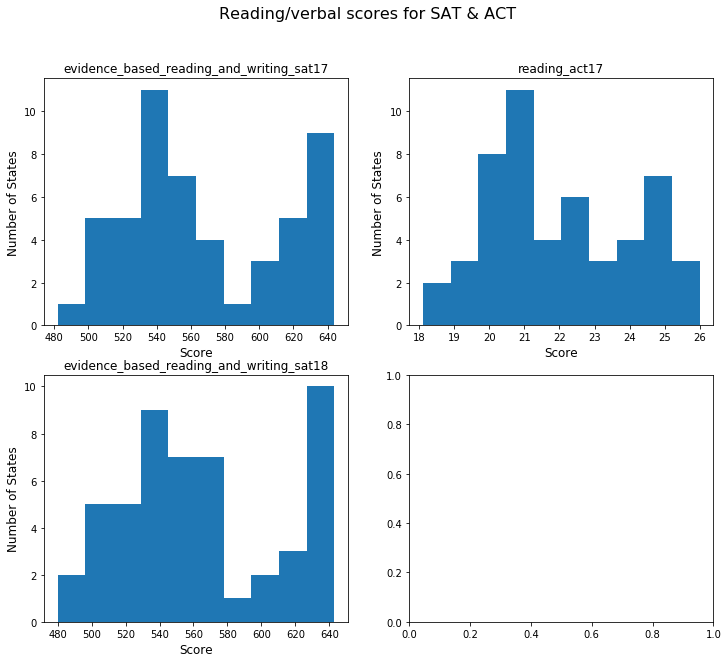

In [72]:
# Reading/verbal scores for SAT & ACT
subplot_histograms('Reading/verbal scores for SAT & ACT',final,
                   ['evidence_based_reading_and_writing_sat17',
                    'reading_act17',
                    'evidence_based_reading_and_writing_sat18'],
                   'Number of States', 'Score')
#we only have composite data for ACT 2018 as such the reading score plot for ACT 2018 is absent

#### Observation and Intepretation of Reading and Writing
SAT 2018 ERW has some level of improvement from the previous year

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [73]:
#function for scatter plot
def scatter_plot(plotname, dataframe, x_axis, y_axis, x_label, y_label):
    dataf = dataframe[[x_axis, y_axis]]  #creating a dataframe with selected axes
    fig = sns.lmplot(x=x_axis, y=y_axis, data = dataf)  #scatter with line of best fit to show correlation
    fig.set(xlabel=x_label, ylabel=y_label)  # adding xy labels
    ax = plt.gca()
    ax.set_title(plotname)  #adding title

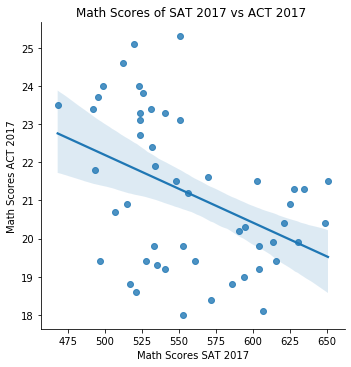

In [74]:
#Math Scores of SAT 2017 vs ACT 2017
scatter_plot('Math Scores of SAT 2017 vs ACT 2017 ',
             final,
             'math_sat17', 'math_act17',
             'Math Scores SAT 2017', 'Math Scores ACT 2017')

There seems to be trand of inverse proportionality between Math Scores of SAT and ACT 17.  
Though not particularly a strong correlation, when inferred from this correlation alone and assuming the same population did same exam, one could say that states who did better in SAT math did worse for ACT math.

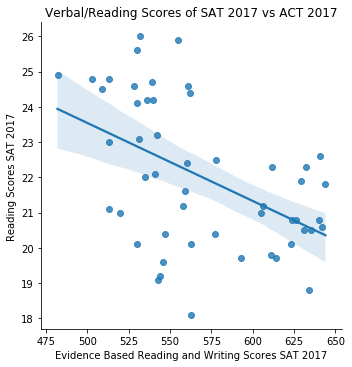

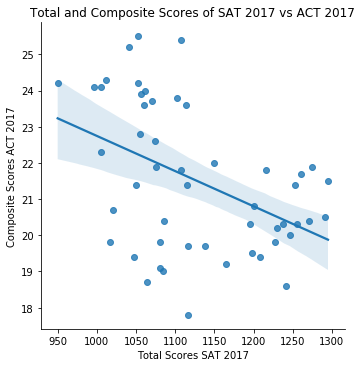

In [75]:
#Verbal/Reading Scores of SAT 2017 vs ACT 2017
scatter_plot('Verbal/Reading Scores of SAT 2017 vs ACT 2017',
             final,
             'evidence_based_reading_and_writing_sat17', 'reading_act17',
             'Evidence Based Reading and Writing Scores SAT 2017', 'Reading Scores SAT 2017')
#Total and Composite Scores of SAT 2017 vs ACT 2017
scatter_plot('Total and Composite Scores of SAT 2017 vs ACT 2017',
             final,
             'total_sat17', 'composite_act17',
             'Total Scores SAT 2017', 'Composite Scores ACT 2017')

The same could be said of Verbal/Reading Scores of SAT 17 and ACT 17, that theyre inversely proportional and that given the same assumption, one states that do well in one exam will do badly for the other.  
Again, the same can be said for Total and Composite scores of SAT 17 and ACT 17

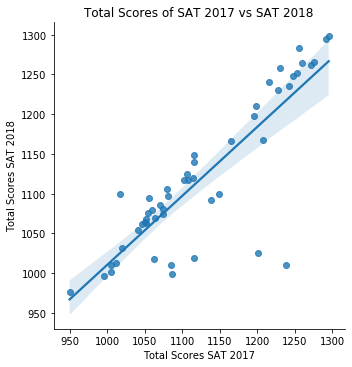

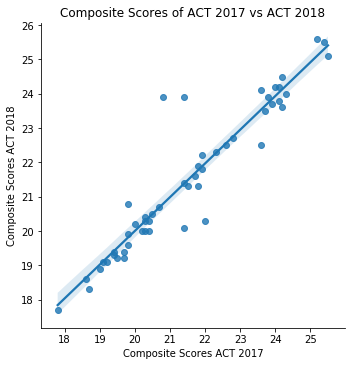

In [76]:
#Total Scores of SAT 2017 vs SAT 2018
scatter_plot('Total Scores of SAT 2017 vs SAT 2018',
             final,
             'total_sat17', 'total_sat18',
             'Total Scores SAT 2017', 'Total Scores SAT 2018')
#Composite Scores of ACT 2017 vs ACT 2018
scatter_plot('Composite Scores of ACT 2017 vs ACT 2018',
             final,
             'composite_act17', 'composite_act18',
             'Composite Scores ACT 2017', 'Composite Scores ACT 2018')

The data points are all cluster near the line of best fit. This shows a direct proportionality between the two scores.  
What can be infered is that states that did well, will continue to do well in the next year for both SAT and ACT.

### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

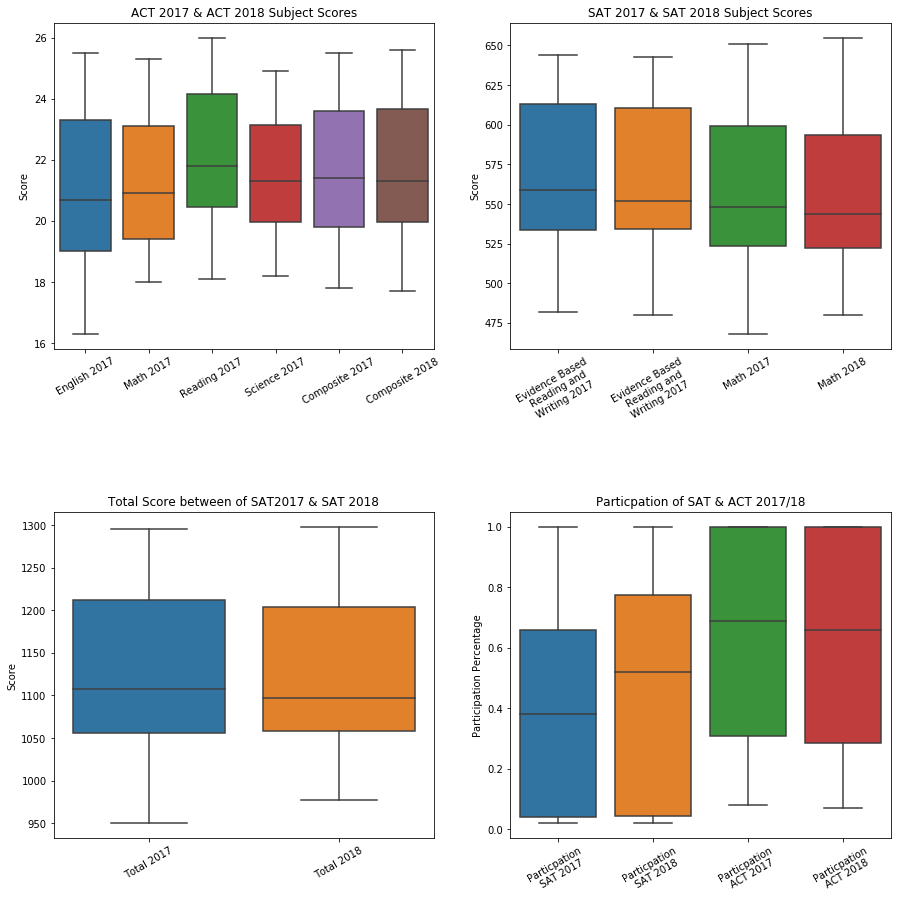

In [77]:
fig, axes = plt.subplots(2,2, figsize=(15,15)) # combining all boxplots together into 1 figure
plt.subplots_adjust(hspace = 0.5)  #adjusting the space between plots

#separating the dataframe into smaller dataframes with similar comparable data
data_act = final[['english_act17','math_act17','reading_act17','science_act17', 'composite_act17', 'composite_act18']]
data_sat = final[['evidence_based_reading_and_writing_sat17',
                  'evidence_based_reading_and_writing_sat18',
                  'math_sat17','math_sat18']]
data_sat_total = final[['total_sat17','total_sat18']]
data_percent = final[['participation_sat17','participation_sat18', 'participation_act17', 'participation_act18']]

            #ACT 2017 & ACT 2018 Subject Scores

#Assigning x ticks to each boxplot
act_xticks = ['English 2017','Math 2017','Reading 2017','Science 2017', 'Composite 2017', 'Composite 2018']
bxplt_1 = sns.boxplot(data=data_act, ax=axes[0][0])  #create boxplot
bxplt_1.set(ylabel='Score')  #set y label
bxplt_1.set_xticklabels(act_xticks, rotation = 30);  #set xticks
bxplt_1.set_title('ACT 2017 & ACT 2018 Subject Scores');  #set title

            #SAT 2017 & SAT 2018 Subject Scores

#Assigning x ticks to each boxplot
sat_xticks = ['Evidence Based\n Reading and\n Writing 2017','Evidence Based\n Reading and\n Writing 2017', 'Math 2017', 'Math 2018']
bxplt_2 = sns.boxplot(data=data_sat,  ax=axes[0][1])  #create boxplot
bxplt_2.set(ylabel='Score')  #set y label
bxplt_2.set_xticklabels(sat_xticks, rotation = 30)  #set xticks
bxplt_2.set_title('SAT 2017 & SAT 2018 Subject Scores');  #set title

            #Total Score between of SAT2017 & SAT 2018

#Assigning x ticks to each boxplot
total_xticks = ['Total 2017', 'Total 2018']
bxplt_3 = sns.boxplot(data=data_sat_total,  ax=axes[1][0])  #create boxplot
bxplt_3.set(ylabel='Score')  #set y label
bxplt_3.set_xticklabels(total_xticks, rotation = 30)  #set xticks
bxplt_3.set_title('Total Score between of SAT2017 & SAT 2018');  #set title

            #Particpation of SAT & ACT 2017/18

#Assigning x ticks to each boxplot
part_xticks = ['Particpation\n SAT 2017', 'Particpation\n SAT 2018', 'Particpation\n ACT 2017', 'Particpation\n ACT 2018']
bxplt_4 = sns.boxplot(data=data_percent,  ax=axes[1][1])  #create boxplot
bxplt_4.set(ylabel='Participation Percentage')  #set y label
bxplt_4.set_xticklabels(part_xticks, rotation = 30)  #set xticks
bxplt_4.set_title('Particpation of SAT & ACT 2017/18');  #set title

#### ACT 2017 & ACT 2018 Subject Scores :


From the plots was can see a large IQR for English 2017.  
The medians are relatively similar with the exception of Reading 2017.  
Composoite scores are pretty much the same for both years.

#### SAT 2017 & SAT 2018 Subject Scores:


The medians for SAT scores seem to have dropped a little for both subjects over the year.  
IQR and spread seems to be very similar for ERW but has shifted up for Math from 2017 to 2018.

#### Total Score between of SAT2017 & SAT 2018:


IQR and median seems to have dropped in 2018 and seeing from the previous plot, it could be very well due to to the math scores in 2018.

#### Particpation of SAT & ACT 2017/18:

Participation rates improved over the year for SAT and a slight deprovement for ACT.  
However, ACT participation can be seen to clearly trump SAT participation

### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

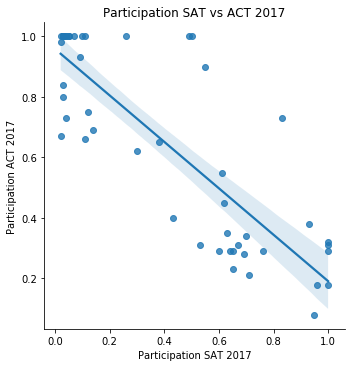

In [78]:
#plotting scatter plot of SAT vs ACT in 2017
scatter_plot('Participation SAT vs ACT 2017',
             final,
             'participation_sat17', 'participation_act17',
             'Participation SAT 2017', 'Participation ACT 2017')

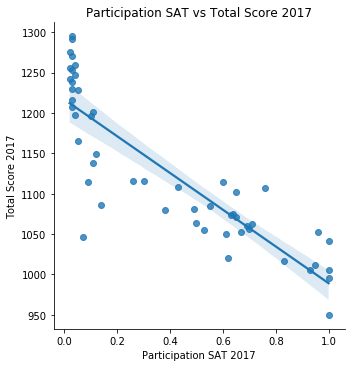

In [90]:
#plotting scatter plot of SAT vs ACT in 2017
scatter_plot('Participation SAT vs Total Score 2017',
             final,
             'participation_sat17', 'total_sat17',
             'Participation SAT 2017', 'Total Score 2017')

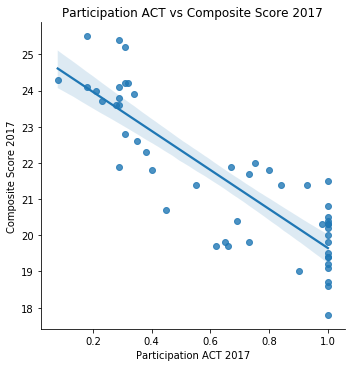

In [118]:
#plotting scatter plot of SAT vs ACT in 2017
scatter_plot('Participation ACT vs Composite Score 2017',
             final,
             'participation_act17', 'composite_act17',
             'Participation ACT 2017', 'Composite Score 2017')

#### Participation SAT vs ACT 2017

Its very clear that the participation for ACT and SAT are inversely proportional.  
It can be deduced that a state that does not do one, does the other.

SAT and ACT vs Total/Composite Scores

As can be seen states with higher participation rates in ACT, their Composite scores are in the lower spectrum  

As for SAT, states with low participation, a large number of them scored the highest in Total Score

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [79]:
#creating a list of columns minus state as it is a string value
ch_list = final.columns.tolist()
ch_list = ch_list[1:]

In [80]:
#creating histograms for all data to show distribution
def subplot_dist(plotname,dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,30)) # specified figsize
    plt.subplots_adjust(top = 0.95, hspace = 0.5)
    fig.suptitle(plotname, fontsize=16)# plot title added
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_title(column)  #title for each plot
        ax[i].set_xlabel(list_of_xlabels, size = 'large') #xlabel
        ax[i].set_ylabel(list_of_titles, size= 'large')  #ylabel

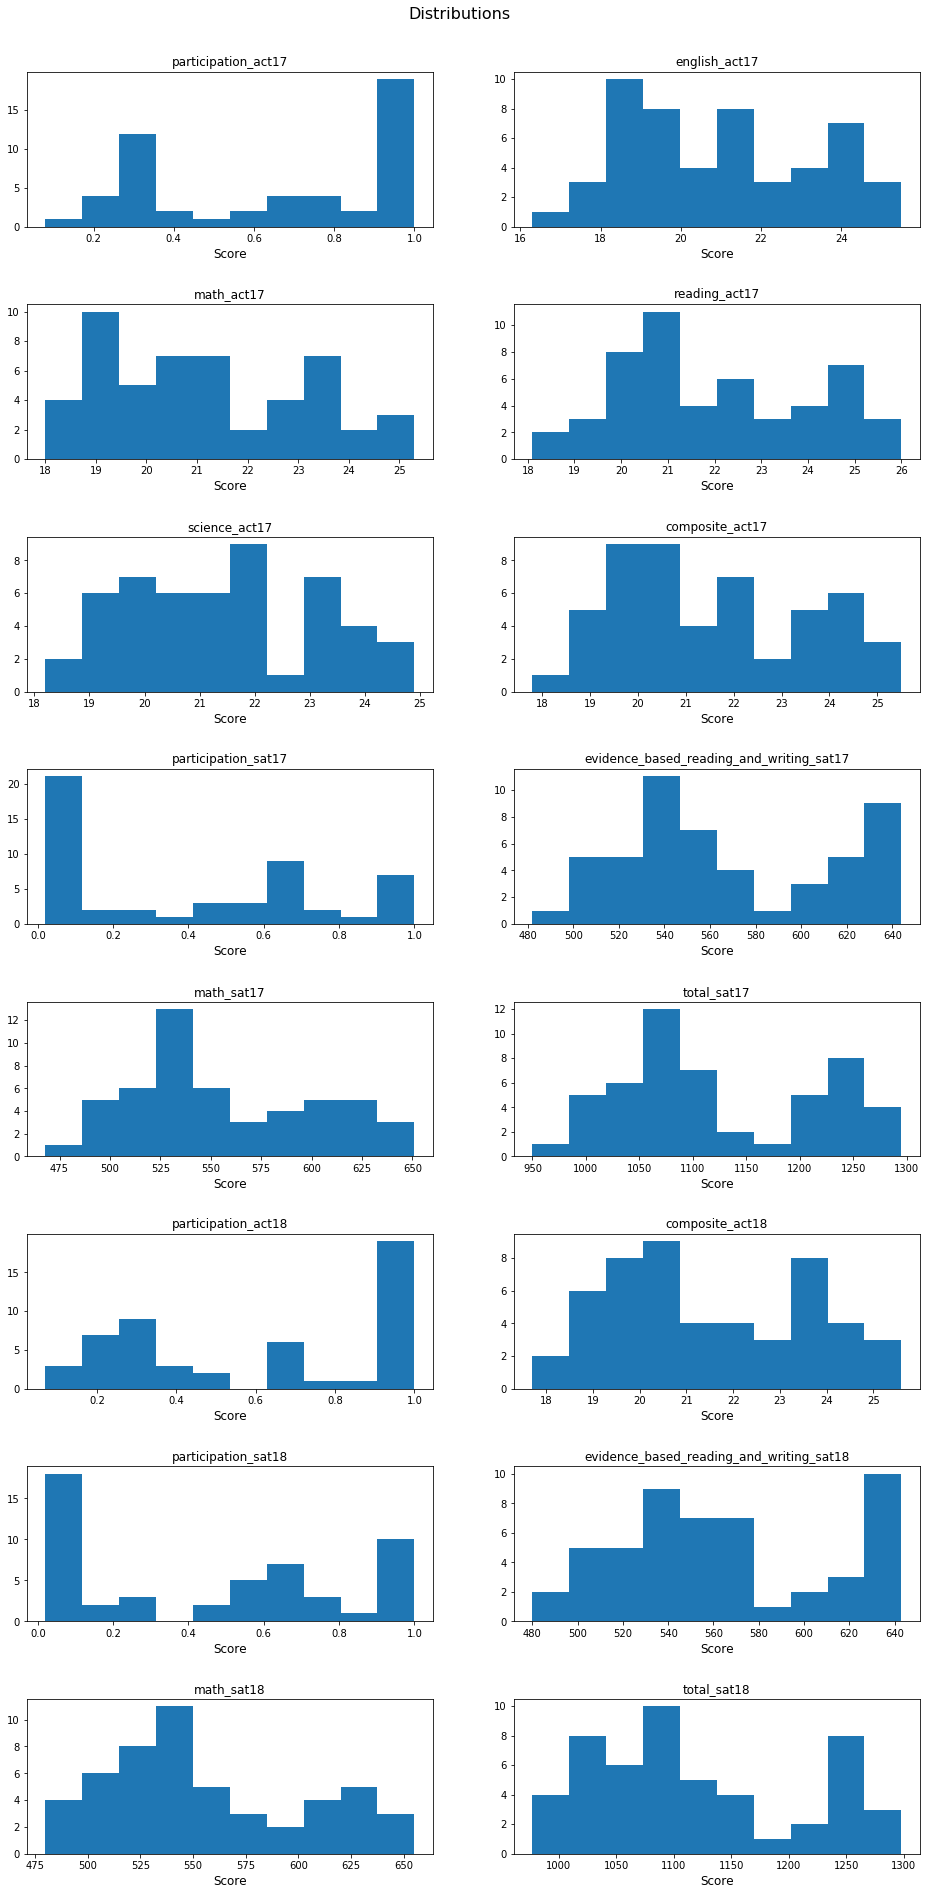

In [81]:
subplot_dist('Distributions', final, ch_list, '', 'Score');


The distributions of each column in the data set can be represented in histograms. Which we previously did for a few for the sake of comparison.

Above are all the histograms for the particpation rate and scores of each subject for both tests.  
As can be seen, Participation for SAT are very skewed to the left and ACT is skewed to the right. 


For each subject, their spreads are very similar to each other and so are their shapes.
Generally speaking, all the subjects have two peaks with the higher peak being on the lower spectrum.  
Median values being around 21 for ACT and 550 for SATs so with respect to their spreads, with the mean being slightly higher, they're slightly skewed to the right


However it is difficult to say if it is normally distributed when there are only 51 pieces of data.  


In [82]:
#getting th median values
final.agg(np.median)

participation_act17                            0.69
english_act17                                 20.70
math_act17                                    20.90
reading_act17                                 21.80
science_act17                                 21.30
composite_act17                               21.40
participation_sat17                            0.38
evidence_based_reading_and_writing_sat17     559.00
math_sat17                                   548.00
total_sat17                                 1107.00
participation_act18                            0.66
composite_act18                               21.30
participation_sat18                            0.52
evidence_based_reading_and_writing_sat18     552.00
math_sat18                                   544.00
total_sat18                                 1097.00
dtype: float64


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: We do observe this trend in the subjects but not in the participation rates.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:  
Yes for both Math and Reading as they are tests done by the population.
As for rate. This could be regulated and therfore holds a level of bias/restriction that affects the data.
Unless each state and each student has equal opportunity to choose between either exam, then the normal distribution would hold true.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:  
Unfortunately no, as there are a lot of variables involved in the fairness of the "experiment". 
The granularity (aka resolution) is too poor with only 51 sets of data to make a definitive statement.
Different states have different population sizes, the exams may be structured very differently for btoh exams in comparison to the education given in that state.  
Different participation rates would be giving an even more varied sample size for each state.  
Governance and regulation also plays a role in the participation rates and education system.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:  
No, they may have different parameters of ascertaining mathematical ability and different states may have different education systems tailored to a specific exam.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [83]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [84]:
#Extracting just participation rates
part_17_states = final[['participation_sat17', 'participation_act17']]
part_18_states = final[['participation_sat18', 'participation_act18']]

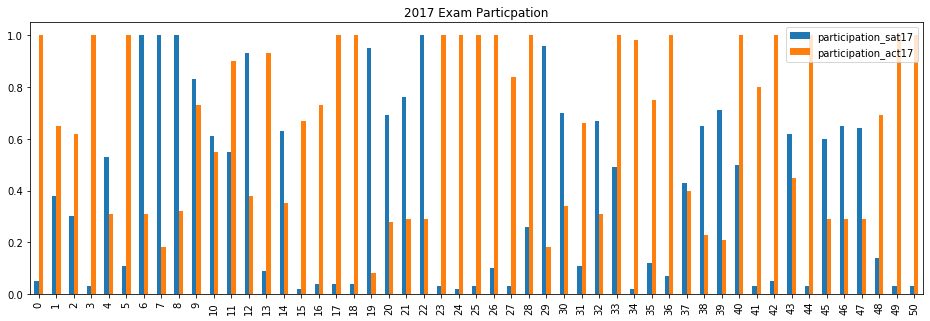

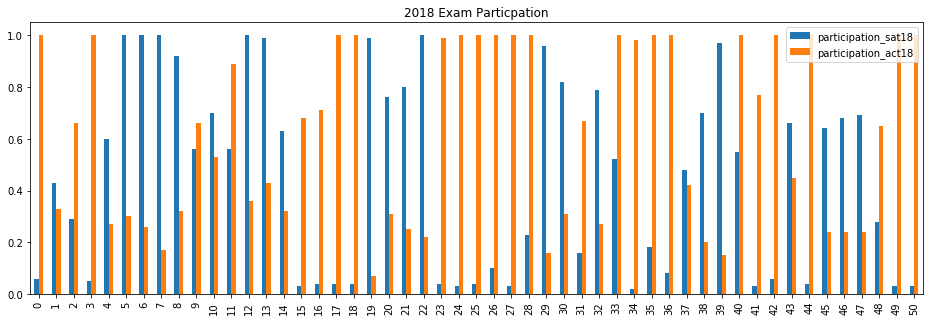

In [85]:
#plotting a barchart for each state's participation rate for both exams
part_17_states.plot(kind='bar', figsize=(16,5), title = '2017 Exam Particpation')
part_18_states.plot(kind='bar', figsize=(16,5), title = '2018 Exam Particpation');

In [86]:
final['state'].iloc[[0,9,19]]
#Alabama, Florida and Maine

0     Alabama
9     Florida
19      Maine
Name: state, dtype: object

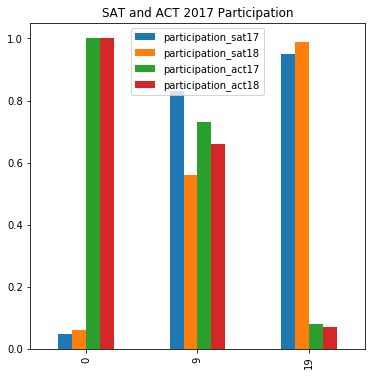

In [116]:
#plotting histogram of 2017 participation for the 3 states
row1 = final.loc[(final['state'] == 'Alabama') | (final['state'] == 'Florida') | (final['state'] == 'Maine') ]
row1_part= row1[['state','participation_sat17', 'participation_sat18', 'participation_act17', 'participation_act18']]
row1_part.set_index('state')
row1_part.plot(kind='bar', figsize=(6,6), title= 'SAT and ACT 2017 Participation');

In [ ]:
#getting the participation rates for the 3 states in both years and exams
Alabama_sat = final.loc[0,'participation_sat17']
Alabama_act = final.loc[0,'participation_act17']
Florida_sat = final.loc[9,'participation_sat17']
Florida_act = final.loc[9,'participation_act17']
Maine_sat = final.loc[19,'participation_sat17']
Maine_act = final.loc[19,'participation_act17']

print("Alabama Participation rate for SAT is", Alabama_sat, "and ACT is", Alabama_act)
print("Florida Participation rate for SAT is", Florida_sat, "and ACT is", Florida_act)
print("Maine Participation rate for SAT is", Maine_sat, "and ACT is", Maine_act)

So we can see here that for Alabama and Maine, participation rates for the two exams are inversely poportional  
and for Florida, we have relatively high participation rates for both, meaning that some students are taking both exams.  
For Alabama, it is a requirement for High Schools to take ACT.  
The same goes for Maine but for SAT.  
For Florida however, they are required to achieve a specified score for either. Which makes sense for them to take both, as one could choose the exam results of the better one.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Alabama, could do the same as Florida and provide a platform to take either exam, to boost SAT participation rates.  Subsidies and education geared towards SATs would boost participation rates of those states such as Alabama.
Strictly speaking the only difference ACTs have against SATs is just a science component, otherwise they're very very similar in nature, such as duration and cost. Therefore this needs to be highlighted to the public.  
The changes between the old and new SATs and its format need to be clarified as well.

Additional data such as college admission rates and percentage of those with scholarships. Also grades of college students who took ACTs than SATs in high school to see if the science component plays a big role in the admissions. 
Tuition costs and materials for each exam should be known as well.
Such information would aid in this conditional investigation.

### Citations and Resources

Glum, J. (2016, June 2). Why The New SAT Format Could Mean The Famous College Exam Is Dying. Retrieved from https://www.ibtimes.com/why-new-sat-format-could-mean-famous-college-exam-dying-2376741


Pittman, O. (2019, December 5). Do Colleges Prefer the ACT or SAT? - College Raptor. Retrieved from https://www.collegeraptor.com/getting-in/articles/act-sat/act-vs-sat-which-college-entrance-exam-is-more-popular/


Hanson, B. (2016, March 2). I know that ACT is becoming more popular than SAT, but then why are SAT prep apps much more popular? - Quora. Retrieved from https://www.quora.com/I-know-that-ACT-is-becoming-more-popular-than-SAT-but-then-why-are-SAT-prep-apps-much-more-popular